# Analyse 2

Bereken hoeveel je de afgelopen jaren in totaal zou verdiend hebben mocht je telkens consequent 10 EUR hebben ingezet op de laagste van de 3 mogelijke bets (thuis wint / gelijkspel / uit wint)
Als er geen laagste was (bijvoorbeeld bet voor thuis wint = bet voor gelijkspel), dan neem je deze record niet op in de berekeningen.
Voer de berekening eerst uit voor 1 van de 6 aanbieders van weddenschappen (B365 / BS / BW / IW / WH / VC)
Herneem de berekening, maar maak nu gebruik van het maximum bedrag dat je had kunnen krijgen.
Bijvoorbeeld
- B365 --> 1.22 EUR (Bet 365)
- BS --> 1.25 EUR (Blue Square)
- BW --> 1.20 EUR (Bet & Win)
- IW --> 1.28 EUR (Interwetten)
- WH --> 1.25 EUR (William Hill)
- VC --> 1.23 EUR (VC Bet)

In dit geval kies je voor IW want daar krijg je de grootste winst uitbetaald (1.28 EUR) 

In [25]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [26]:
# Datasets inladen
wedstrijddata = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/wedstrijden.csv", sep=";")
betdata = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/bets_historische_data.csv", sep=",")

In [27]:
# De eerste 10 rijen van de dataset bekijken
wedstrijddata.head(10)

,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,0,2
0,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,3,2
1,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,0,7
2,1960,1,1960-09-04,15:00,4008206,13,Beerschot,33,Verviétois,1,0
3,1960,1,1960-09-04,15:00,4008207,3,Club Brugge,10,Union Saint-Gilloise,1,2
4,1960,1,1960-09-04,15:00,4008208,2,Daring Club Brussel,3434,Patro Eisden,2,1
5,1960,1,1960-09-04,15:00,4008209,4,RFC Luik,7,KAA Gent,2,1
6,1960,1,1960-09-04,15:00,4008210,553,Waterschei SV Thor,30,Lierse SK,5,0
7,1960,2,1960-09-11,15:00,4008211,16,Standard Luik,90,Eendracht Aalst,3,0
8,1960,2,1960-09-11,15:00,4008212,35,RSC Anderlecht,4,RFC Luik,2,3
9,1960,2,1960-09-11,15:00,4008213,1,Royal Antwerp FC,2,Daring Club Brussel,2,3


In [28]:
# De eerste 10 rijen van de dataset bekijken
betdata.head(10)

,Datum,StamnummerThuis,StamnummerUit,B365ThuisWint,B365Gelijkspel,B365UitWint,BWThuisWint,BWGelijkspel,BWUitWint,IWThuisWint,IWGelijkspel,IWUitWint,WHThuisWint,WHGelijkspel,WHUitWint,VCThuisWint,VCGelijkspel,VCUitWint,MeerDoelpunten>2.5,MinderDoelpunten<2.5
0,2000-08-12,2300,22,NaN,NaN,NaN,NaN,NaN,NaN,2.00,3.0,2.90,2.00,3.40,2.90,NaN,NaN,NaN,NaN,NaN
1,2000-08-12,25,322,NaN,NaN,NaN,NaN,NaN,NaN,2.10,3.0,2.80,2.40,3.30,2.40,NaN,NaN,NaN,NaN,NaN
2,2000-08-12,94,282,NaN,NaN,NaN,NaN,NaN,NaN,2.35,3.0,2.35,2.40,3.30,2.40,NaN,NaN,NaN,NaN,NaN
3,2000-08-12,224,3530,NaN,NaN,NaN,NaN,NaN,NaN,1.80,3.0,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-08-12,2024,1,NaN,NaN,NaN,NaN,NaN,NaN,1.75,3.1,3.60,1.61,3.60,4.20,NaN,NaN,NaN,NaN,NaN
5,2000-08-13,373,35,NaN,NaN,NaN,NaN,NaN,NaN,3.80,3.2,1.65,3.80,3.50,1.70,NaN,NaN,NaN,NaN,NaN
6,2000-08-13,1615,16,NaN,NaN,NaN,NaN,NaN,NaN,2.60,3.0,2.20,2.60,3.30,2.25,NaN,NaN,NaN,NaN,NaN
7,2000-08-13,3,7,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.2,4.20,1.61,3.75,4.00,NaN,NaN,NaN,NaN,NaN
8,2000-08-13,90,30,NaN,NaN,NaN,NaN,NaN,NaN,2.30,3.0,2.40,2.40,3.30,2.40,NaN,NaN,NaN,NaN,NaN
9,2000-08-19,16,94,NaN,NaN,NaN,NaN,NaN,NaN,1.25,4.3,8.00,1.30,4.30,7.50,NaN,NaN,NaN,NaN,NaN


In [33]:
# Functie om de laagste unieke quote te filteren voor B365
def filter_min_unique_b365(row):
    quotes = [row['B365ThuisWint'], row['B365Gelijkspel'], row['B365UitWint']]
    min_quote = min(quotes)
    if quotes.count(min_quote) == 1:
        return min_quote
    return None
# Bereken het totaal verdiende geld met €10 inzet op de laagste quote van B365
betdata['MinQuoteB365'] = betdata.apply(filter_min_unique_b365, axis=1)
total_winnings_b365 = betdata['MinQuoteB365'].dropna().sum() * 10


# Functie om de laagste unieke quote te filteren voor BW
def filter_min_unique_bw(row):
    quotes = [row['BWThuisWint'], row['BWGelijkspel'], row['BWUitWint']]
    min_quote = min(quotes)
    if quotes.count(min_quote) == 1:
        return min_quote
    return None
# Bereken het totaal verdiende geld met €10 inzet op de laagste quote van BW
betdata['MinQuoteBW'] = betdata.apply(filter_min_unique_bw, axis=1)
total_winnings_bw = betdata['MinQuoteBW'].dropna().sum() * 10


# Functie om de laagste unieke quote te filteren voor IW
def filter_min_unique_iw(row):
    quotes = [row['IWThuisWint'], row['IWGelijkspel'], row['IWUitWint']]
    min_quote = min(quotes)
    if quotes.count(min_quote) == 1:
        return min_quote
    return None
# Bereken het totaal verdiende geld met €10 inzet op de laagste quote van IW
betdata['MinQuoteIW'] = betdata.apply(filter_min_unique_iw, axis=1)
total_winnings_iw = betdata['MinQuoteIW'].dropna().sum() * 10


# Functie om de laagste unieke quote te filteren voor WH
def filter_min_unique_wh(row):
    quotes = [row['WHThuisWint'], row['WHGelijkspel'], row['WHUitWint']]
    min_quote = min(quotes)
    if quotes.count(min_quote) == 1:
        return min_quote
    return None
# Bereken het totaal verdiende geld met €10 inzet op de laagste quote van WH
betdata['MinQuoteWH'] = betdata.apply(filter_min_unique_wh, axis=1)
total_winnings_wh = betdata['MinQuoteWH'].dropna().sum() * 10


# Functie om de laagste unieke quote te filteren voor VC
def filter_min_unique_vc(row):
    quotes = [row['VCThuisWint'], row['VCGelijkspel'], row['VCUitWint']]
    min_quote = min(quotes)
    if quotes.count(min_quote) == 1:
        return min_quote
    return None
# Bereken het totaal verdiende geld met €10 inzet op de laagste quote van VC
betdata['MinQuoteVC'] = betdata.apply(filter_min_unique_vc, axis=1)
total_winnings_vc = betdata['MinQuoteVC'].dropna().sum() * 10


# Nu voor de maximale quote van alle aanbieders
betdata['MaxQuote'] = betdata[['B365ThuisWint', 'B365Gelijkspel', 'B365UitWint', 
                               'BWThuisWint', 'BWGelijkspel', 'BWUitWint',
                               'IWThuisWint', 'IWGelijkspel', 'IWUitWint', 
                               'WHThuisWint', 'WHGelijkspel', 'WHUitWint',
                               'VCThuisWint', 'VCGelijkspel', 'VCUitWint']].max(axis=1)
total_max_winnings = betdata['MaxQuote'].sum() * 10

print(f'Totaal gewonnen met B365 laagste inzet: €{total_winnings_b365:.2f}')
print(f'Totaal gewonnen met BW laagste inzet: €{total_winnings_bw:.2f}')
print(f'Totaal gewonnen met IW laagste inzet: €{total_winnings_iw:.2f}')
print(f'Totaal gewonnen met WH laagste inzet: €{total_winnings_wh:.2f}')
print(f'Totaal gewonnen met VC laagste inzet: €{total_winnings_vc:.2f}')
print(f'Totaal gewonnen met maximale quote inzet: €{total_max_winnings:.2f}')

Totaal gewonnen met B365 laagste inzet: €107128.40
Totaal gewonnen met BW laagste inzet: €97729.40
Totaal gewonnen met IW laagste inzet: €110126.50
Totaal gewonnen met WH laagste inzet: €108708.90
Totaal gewonnen met VC laagste inzet: €92118.77
Totaal gewonnen met maximale quote inzet: €326492.99


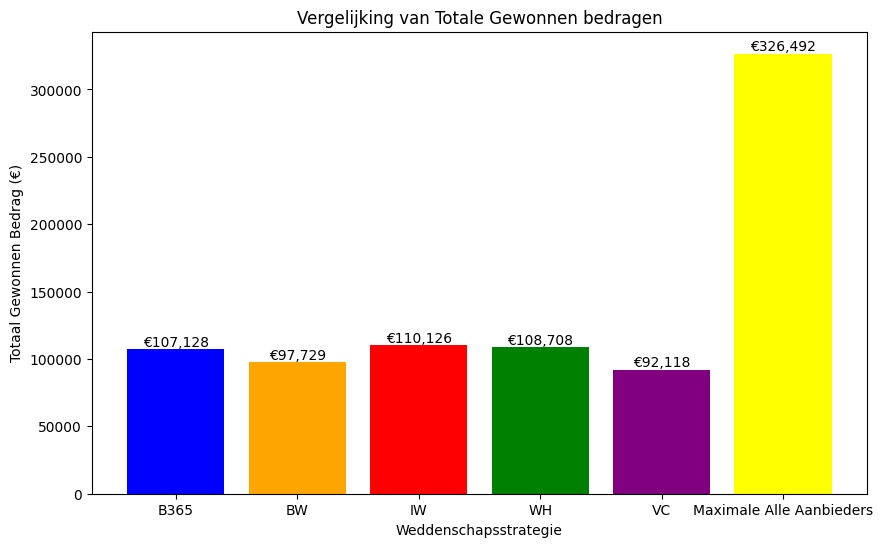

In [38]:
# Grafiek met totale winst van beide gevallen
labels = ['B365', 'BW', 'IW', 'WH', 'VC', 'Maximale Alle Aanbieders']
winnings = [total_winnings_b365, total_winnings_bw, total_winnings_iw, total_winnings_wh, total_winnings_vc, total_max_winnings]

# Staafdiagram
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, winnings, color=['blue', 'orange', 'red', 'green', 'purple', 'yellow'])

# Toevoegen van titel en labels
plt.title('Vergelijking van Totale Gewonnen bedragen')
plt.xlabel('Weddenschapsstrategie')
plt.ylabel('Totaal Gewonnen Bedrag (€)')

# Numerieke labels toevoegen boven elke staaf
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'€{int(yval):,}', va='bottom', ha='center')

plt.show()
